# Projected Gradient Descent

---

今回は凸関数ではない時の数理最適化についてのアルゴリズムを解説していきます．

数理最適化をする観点では凸関数のものを考えた方が解析しやすいのですが，現実世界の問題では非凸関数の場合の最適化の方が多いと知られています．

---

まず，凸関数について説明していきます．次の集合を凸集合といいます．

### 凸集合

集合$\mathcal{C} \in \mathbb{R}^p$を考え，そこから要素$\mathbf{x}, \mathbf{y} \in \mathbb{R}^p$を取ってきます．$\lambda = (0,1]$ とし，考えると次の条件が満たされれば$\mathcal{C}$ は凸集合であると言えます．

$$
(1-\lambda) \cdot \mathbf{x}+\lambda \cdot \mathbf{y} \in \mathcal{C}
$$



図で考えると次のようなものになります．

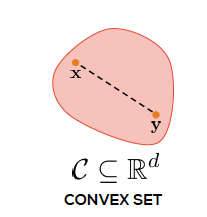

### 凸関数

微分可能な関数$f: \mathbb{R}^p \rightarrow \mathbb{R}$を考え，凸集合内の$x,y$について次のことが成り立つと関数$f$は凸関数であると言います．

$$
f(\mathbf{y}) \geq f(\mathbf{x})+\langle\nabla f(\mathbf{x}), \mathbf{y}-\mathbf{x}\rangle
$$

---


ここから本題で，凸集合に入っていないある要素$z$がある時どのようにして，解けば良いのでしょうか．

一般的なおおまかな解き方は２つあり，1つ目は$z$をある作用素で，凸集合内に射影する．

2つ目はそのまま最適化を実行するという方法です．

今回は1つ目のやり方の射影する方をコードも含めて説明します．

次のような射影演算子を考えます．

$\mathcal{C}$を凸集合と考え,


$$
\Pi_{\mathcal{C}}(\mathbf{z}):=\underset{\mathbf{x} \in \mathcal{C}}{\arg \min }\|\mathbf{x}-\mathbf{z}\|_2 .
$$


この射影演算子の行なっていることを図で表すと，射影した後の要素を$z'$とすると，

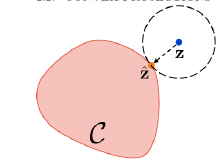

このようなことをしています．

つまり，射影した後の要素は凸集合の中に入っているので，そのまま最適化ができるわけですね．

アルゴリズムは次のようになっています．

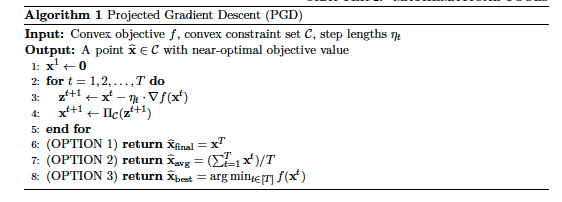

---

ここからコードを書いていきます．

今回は集合$\mathcal{C}$をL2-ballで半径1の場合を考え,関数は$x^2 + y ^ 2$を考えます．

In [6]:
import numpy as np

def projected_gradient_descent(f, grad_f, proj, init_val, lr=0.1, max_iter=1000, tol=1e-8):
    '''
    lr : 学習率
    max_iter : 最大繰り返し回数
    tol : 収束判定の閾値

    '''
   
    x = init_val
    obj_vals = [f(x)]

    for i in range(max_iter):
        grad = grad_f(x)
        x_new = x - lr * grad
        #新しく求めたx_newを射影する
        x_new = proj(x_new)
        obj_new = f(x_new)
        obj_vals.append(obj_new)

        if abs(obj_new - obj_vals[-2]) / obj_vals[-2] < tol:
            break

        x = x_new

    return x, obj_vals

def f(x):
    return x[0]**2 + x[1]**2

def grad_f(x):
    return np.array([2 * x[0], 2 * x[1]])


def proj(x):
    norm_x = np.linalg.norm(x)
    if norm_x <= 1:
        return x
    else:
        return x / norm_x


initial_val = np.array([2.0, 2.0])
x_pgd, obj_vals_pgd = projected_gradient_descent(f, grad_f, proj, initial_val, lr=0.1, max_iter=1000, tol=1e-6)


print("PGD solution: x,y =", x_pgd, ", f(x,y) =", f(x_pgd))


PGD solution: x,y = [1.08738167e-97 1.08738167e-97] , f(x,y) = 2.3647977848503806e-194


$f(x,y)$の値が0に近くなってますね．